In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')


<h2>Load Train & Test data</h2>

In [3]:
dataset_train = pd.read_csv("E:/Internship/Financial data fraud/train_csv.csv")
dataset_test = pd.read_csv("E:/Internship/Financial data fraud/test.csv.csv")
submission = pd.read_csv("E:/Internship/Financial data fraud/sample_submission.csv")

In [4]:
dataset_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
dataset_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [6]:
dataset_train = dataset_train.drop_duplicates()
dataset_test = dataset_test.drop_duplicates()



In [7]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


# Data preprocessing

In [9]:
df = pd.concat([dataset_train, dataset_test])
df.head()
##Concatenating the train and test dataset to process in same way 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [10]:
# Dropping the unnecessary columns
df.drop('Loan_ID', inplace=True, axis='columns')

In [11]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [12]:
# Identify missing values in dataset
df.isnull().sum()

Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [13]:
gender_mode = df['Gender'].mode()[0]
married_mode = df['Married'].mode()[0]
dependents_mode = df['Dependents'].mode()[0]
self_employed_mode = df['Self_Employed'].mode()[0]
credit_history_mode = df['Credit_History'].mode()[0]


In [14]:
df.fillna({
    'Gender': gender_mode,
    'Married': married_mode,
    'Dependents': dependents_mode,
    'Self_Employed': self_employed_mode,
    'Credit_History': credit_history_mode
}, inplace=True)

In [15]:
#checking null values
df.isnull().sum()

Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History         0
Property_Area          0
Loan_Status          367
dtype: int64

In [16]:
from sklearn.impute import KNNImputer
#K-Nearest Neighbors (KNN) imputation is a versatile method for handling missing values by leveraging information from neighboring data points
imputer = KNNImputer(n_neighbors=5)
df[['LoanAmount', 'Loan_Amount_Term']] = imputer.fit_transform(df[['LoanAmount', 'Loan_Amount_Term']])


In [17]:
#checking null values
df.isnull().sum()


Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
dtype: int64

In [18]:
df 

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,159.6,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,NaN
363,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,NaN
364,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,1.0,Semiurban,NaN
365,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,NaN


In [19]:
#Mapping the Categorical variables to Interger variables
df['Gender'] = df['Gender'].map({'Male':0,'Female':1})
df['Married'] = df['Married'].map({'No':0, 'Yes':1})#.astype(int)
df['Education'] = df['Education'].map({'Not Graduate':0, 'Graduate':1})#.astype(int)
df['Self_Employed'] = df['Self_Employed'].map({'No':0, 'Yes':1})#.astype(int)
df['Credit_History'] = df['Credit_History']#.astype(int)
df['Property_Area'] = df['Property_Area'].map({'Urban':0, 'Rural':1, 'Semiurban':2})#.astype(int)
df['Dependents'] = df['Dependents'].map({'0':0, '1':1, '2':2, '3+':3})#.astype(int)

In [20]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,1,0,5849,0.0,159.6,360.0,1.0,0,Y
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,1,N
2,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,0,Y
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,0,Y
4,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
362,0,1,3,0,1,4009,1777.0,113.0,360.0,1.0,0,NaN
363,0,1,0,1,0,4158,709.0,115.0,360.0,1.0,0,NaN
364,0,0,0,1,0,3250,1993.0,126.0,360.0,1.0,2,NaN
365,0,1,0,1,0,5000,2393.0,158.0,360.0,1.0,1,NaN


In [21]:
#Create a new feature
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.drop(['ApplicantIncome', 'CoapplicantIncome'], axis='columns', inplace=True)

In [22]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,0,0,0,1,0,159.6,360.0,1.0,0,Y,5849.0
1,0,1,1,1,0,128.0,360.0,1.0,1,N,6091.0
2,0,1,0,1,1,66.0,360.0,1.0,0,Y,3000.0
3,0,1,0,0,0,120.0,360.0,1.0,0,Y,4941.0
4,0,0,0,1,0,141.0,360.0,1.0,0,Y,6000.0


# Exploratory Data Analysis

In [23]:
#Splitting the data into new train and test data to perform EDA
new_train = df.iloc[:614]
new_test = df.iloc[614:]

In [24]:
df.loc[df['Loan_Status'] == 'Y', 'Loan_Status'] = 1
df.loc[df['Loan_Status'] == 'N', 'Loan_Status'] = 0


In [25]:
new_train

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,0,0,0,1,0,159.6,360.0,1.0,0,1,5849.0
1,0,1,1,1,0,128.0,360.0,1.0,1,0,6091.0
2,0,1,0,1,1,66.0,360.0,1.0,0,1,3000.0
3,0,1,0,0,0,120.0,360.0,1.0,0,1,4941.0
4,0,0,0,1,0,141.0,360.0,1.0,0,1,6000.0
...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,1,0,71.0,360.0,1.0,1,1,2900.0
610,0,1,3,1,0,40.0,180.0,1.0,1,1,4106.0
611,0,1,1,1,0,253.0,360.0,1.0,0,1,8312.0
612,0,1,2,1,0,187.0,360.0,1.0,0,1,7583.0


In [26]:
new_test

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,0,1,0,1,0,110.0,360.0,1.0,0,NaN,5720.0
1,0,1,1,1,0,126.0,360.0,1.0,0,NaN,4576.0
2,0,1,2,1,0,208.0,360.0,1.0,0,NaN,6800.0
3,0,1,2,1,0,100.0,360.0,1.0,0,NaN,4886.0
4,0,0,0,0,0,78.0,360.0,1.0,0,NaN,3276.0
...,...,...,...,...,...,...,...,...,...,...,...
362,0,1,3,0,1,113.0,360.0,1.0,0,NaN,5786.0
363,0,1,0,1,0,115.0,360.0,1.0,0,NaN,4867.0
364,0,0,0,1,0,126.0,360.0,1.0,2,NaN,5243.0
365,0,1,0,1,0,158.0,360.0,1.0,1,NaN,7393.0


# Visualising

<Axes: xlabel='Gender', ylabel='count'>

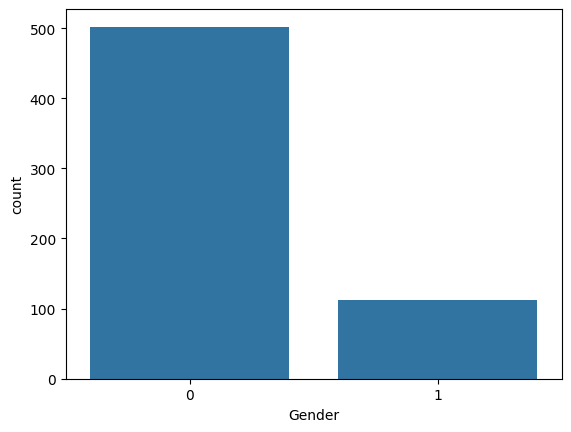

In [27]:
import seaborn as sns
sns.countplot(x='Gender',data=new_train)


<Axes: xlabel='Education', ylabel='count'>

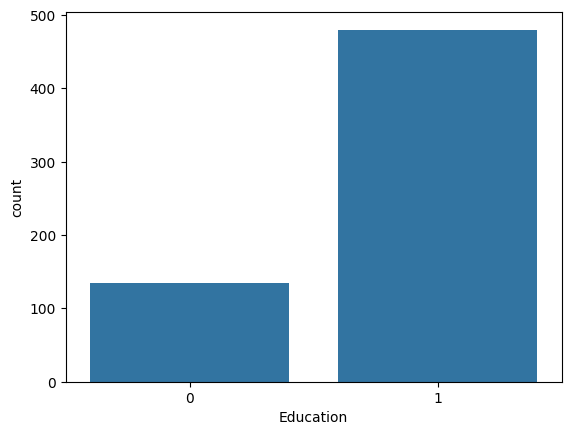

In [28]:
sns.countplot(x='Education',data=new_train)

<Axes: xlabel='Self_Employed', ylabel='count'>

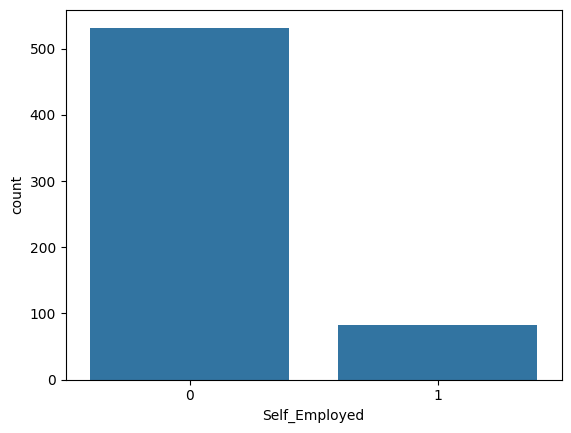

In [29]:
sns.countplot(x='Self_Employed',data=new_train)

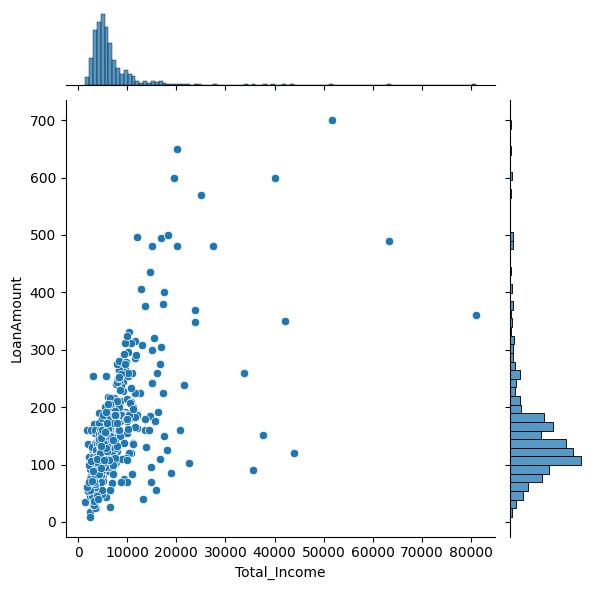

In [30]:
sns.jointplot(x=new_train['Total_Income'],y=new_train['LoanAmount'])

<Axes: >

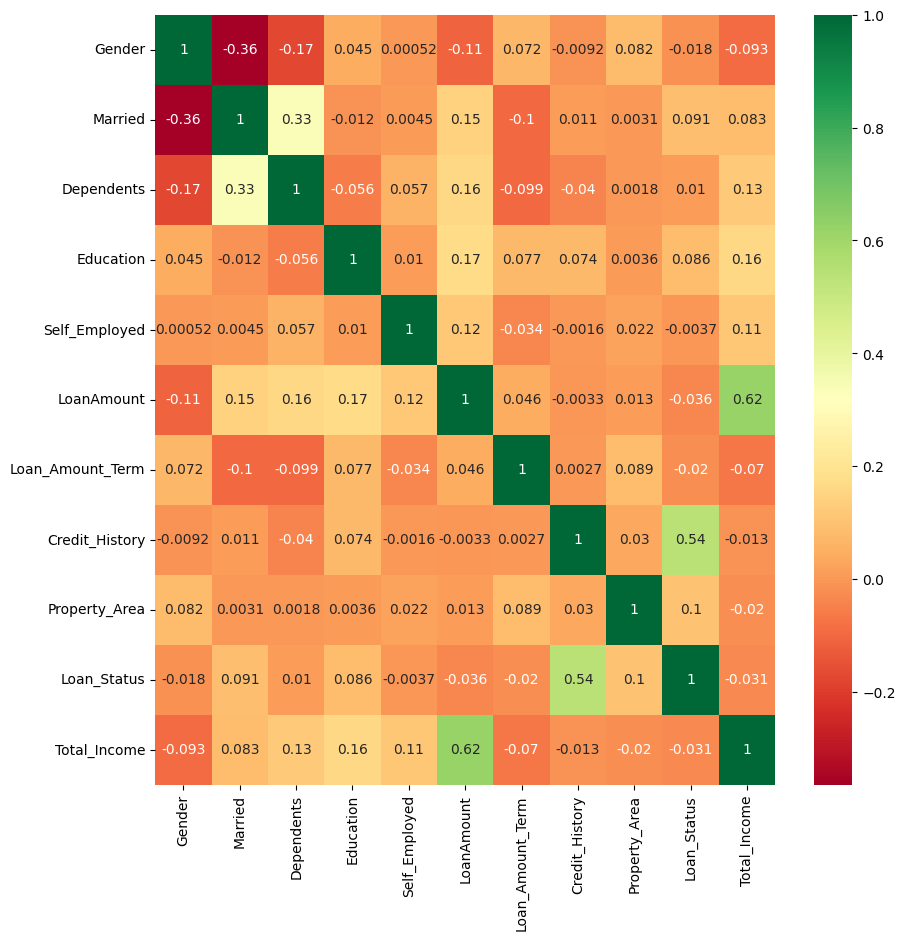

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

correlation_matrix = new_train.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn')

# Machine Learning model

In [32]:
x = new_train.drop('Loan_Status', axis='columns')
y = new_train['Loan_Status']
y = y.astype('int') 

In [33]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=3)


# Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [35]:
from sklearn import metrics

#Getting the accuracy score from Decision Tree
dtree_pred = dtree.predict(X_test)
print('Accuracy score: ', format(metrics.accuracy_score(y_test, dtree_pred)))

Accuracy score:  0.7297297297297297


In [36]:
print(confusion_matrix(y_test,dtree_pred))
print(classification_report(y_test, dtree_pred))

[[ 26  19]
 [ 31 109]]
              precision    recall  f1-score   support

           0       0.46      0.58      0.51        45
           1       0.85      0.78      0.81       140

    accuracy                           0.73       185
   macro avg       0.65      0.68      0.66       185
weighted avg       0.76      0.73      0.74       185



# Random forest

In [37]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

# Getting the accuracy score from Random Forest model
rfc_pred = rfc.predict(X_test)
print('Random Forest accuracy score: ', format(metrics.accuracy_score(y_test,rfc_pred)))

Random Forest accuracy score:  0.8216216216216217


In [38]:
# Classification report and confusion matrix of the Random forest model
print(confusion_matrix(y_test, rfc_pred))
print(classification_report(y_test, rfc_pred))

[[ 25  20]
 [ 13 127]]
              precision    recall  f1-score   support

           0       0.66      0.56      0.60        45
           1       0.86      0.91      0.89       140

    accuracy                           0.82       185
   macro avg       0.76      0.73      0.74       185
weighted avg       0.81      0.82      0.82       185



# Logistic Regression


In [39]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
# Getting the accuracy score from Logistic Regression model

logreg_pred = logreg.predict(X_test)
print('Logistic Regresion accuracy score: ', format(metrics.accuracy_score(y_test, logreg_pred)))


Logistic Regresion accuracy score:  0.8432432432432433


In [40]:
print(confusion_matrix(y_test, logreg_pred))
print(classification_report(y_test, logreg_pred))
print(" confusion matrix is ",confusion_matrix(y_test,dtree_pred))

[[ 21  24]
 [  5 135]]
              precision    recall  f1-score   support

           0       0.81      0.47      0.59        45
           1       0.85      0.96      0.90       140

    accuracy                           0.84       185
   macro avg       0.83      0.72      0.75       185
weighted avg       0.84      0.84      0.83       185

 confusion matrix is  [[ 26  19]
 [ 31 109]]


In [54]:
submission['Loan_Status'] = logreg_pred
submission['Loan_ID'] =dataset_test ['Loan_ID']
submission['Loan_Status'].replace(0, 'N', inplace = True)
submission['Loan_Status'].replace(1, 'Y', inplace = True)
pd.DataFrame(submission,columns = ['Loan_ID','Loan_Status']).to_csv('Log2.csv')
 

In [55]:
submission

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
180,LP002018,N
181,LP002027,N
182,LP002028,N
183,LP002042,Y


# Hence Logistic Regression performs with more accuracy 
¶